In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

## 1. Generating Sequential Data

In [2]:
def generate_data(seq_length=20, num_samples=500):
    X = np.random.rand(num_samples, seq_length, 1)                                     # Random sequences
    y = X.mean(axis=1)                                                                 # Target: mean of sequence
    return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

## 2. Defining Single Layer RNN

In [3]:
class SingleLayerRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SingleLayerRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # Using the last time-step output
        return out

## 3. Defining Stacked RNN

In [4]:
class StackedRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=2):
        super(StackedRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # Using the last time-step output
        return out

## 4. Training Function

In [5]:
def train(model, X_train, y_train, epochs=100, lr=0.01):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    losses = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

        if (epoch+1) % 20 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

    # Plot loss curve
    plt.plot(losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training Loss Curve - {model.__class__.__name__}')
    plt.show()

In [6]:
# Generate data
X_train, y_train = generate_data()

# 5. Initialize and train single-layer RNN

Training Single-Layer RNN...
Epoch 20/100, Loss: 0.0084
Epoch 40/100, Loss: 0.0039
Epoch 60/100, Loss: 0.0037
Epoch 80/100, Loss: 0.0036
Epoch 100/100, Loss: 0.0035


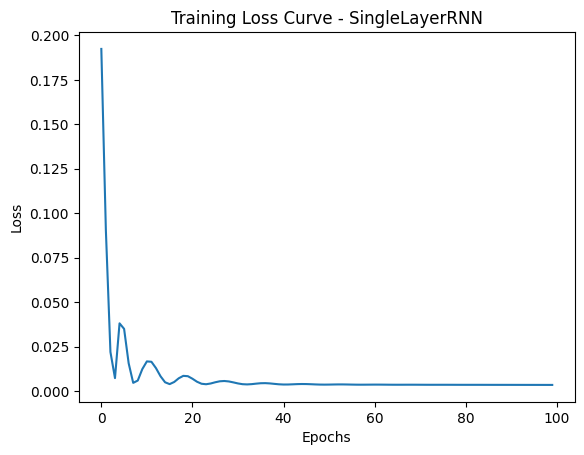

In [14]:
single_rnn = SingleLayerRNN(input_size=1, hidden_size=16, output_size=1)
print("Training Single-Layer RNN...")
single_rnn_losses = train(single_rnn, X_train, y_train)

## 6. Initialize and train stacked RNN

Training Stacked RNN...
Epoch 20/100, Loss: 0.0068
Epoch 40/100, Loss: 0.0043
Epoch 60/100, Loss: 0.0040
Epoch 80/100, Loss: 0.0036
Epoch 100/100, Loss: 0.0119


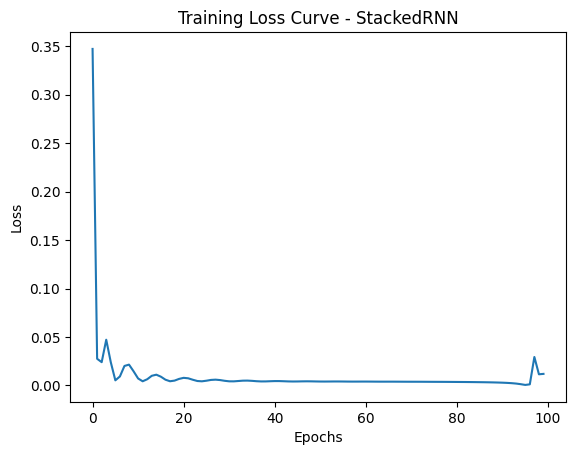

In [15]:
stacked_rnn = StackedRNN(input_size=1, hidden_size=16, output_size=1, num_layers=3)
print("Training Stacked RNN...")
stacked_rnn_losses = train(stacked_rnn, X_train, y_train)

## 7. Testing with single input

In [12]:
sample_input = X_train[:5]  # Take 5 samples for testing
single_output = single_rnn(sample_input).detach().numpy()
stacked_output = stacked_rnn(sample_input).detach().numpy()
y_actual = y_train[:5].numpy()

print("\nSample Input Shape:", sample_input.shape)
print("Single-Layer RNN Output:", single_output)
print("Stacked RNN Output:", stacked_output)
print("Actual Target Values:", y_actual)


Sample Input Shape: torch.Size([5, 20, 1])
Single-Layer RNN Output: [[0.5273484 ]
 [0.5024166 ]
 [0.4887911 ]
 [0.48302376]
 [0.4860478 ]]
Stacked RNN Output: [[0.5637056 ]
 [0.56683093]
 [0.56050545]
 [0.5570064 ]
 [0.56400555]]
Actual Target Values: [[0.5637236 ]
 [0.56158084]
 [0.5883865 ]
 [0.4640418 ]
 [0.4598488 ]]


## 8. Plot predicted vs actual values

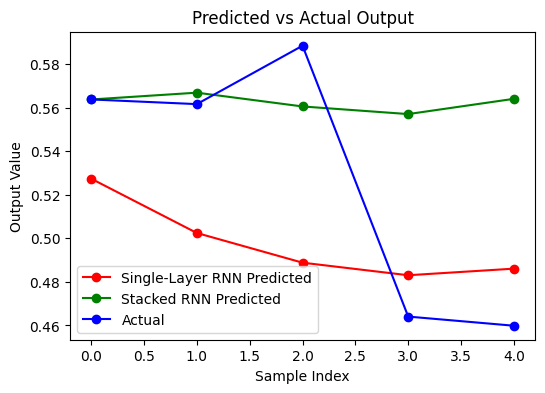

In [13]:
plt.figure(figsize=(6,4))
plt.plot(single_output, 'ro-', label='Single-Layer RNN Predicted')
plt.plot(stacked_output, 'go-', label='Stacked RNN Predicted')
plt.plot(y_actual, 'bo-', label='Actual')
plt.xlabel('Sample Index')
plt.ylabel('Output Value')
plt.title('Predicted vs Actual Output')
plt.legend()
plt.show()